<a href="https://colab.research.google.com/github/BlackBoyZeus/QuantAnalysis/blob/main/Quant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
!pip install matplotlib



Retrieving historical data...
[*********************100%%**********************]  2 of 2 completed
Implementing tactical asset allocation strategy...
Visualizing results...


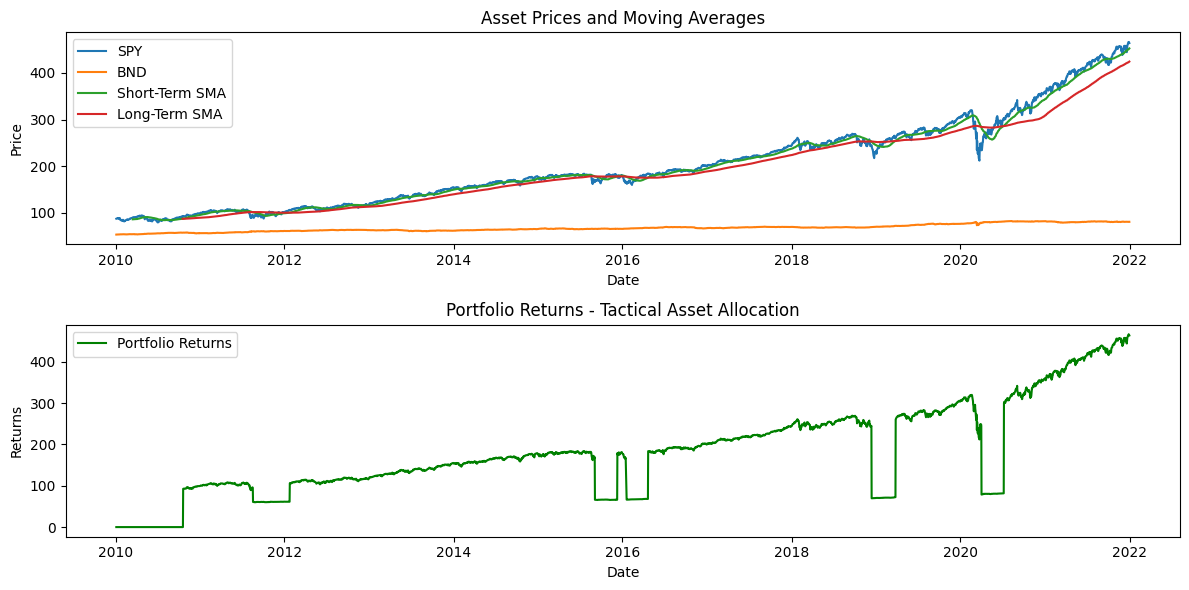

Analyzing results...
Cumulative Returns:
Date
2021-12-27    inf
2021-12-28    inf
2021-12-29    inf
2021-12-30    inf
2021-12-31    inf
Name: Portfolio_Returns, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


In [3]:
# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Retrieve Historical Data
symbols = ["SPY", "BND"]
start_date = "2010-01-01"
end_date = "2022-01-01"

print("Retrieving historical data...")
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Step 2: Implement Tactical Asset Allocation Strategy
short_window = 50
long_window = 200

print("Implementing tactical asset allocation strategy...")
data["SMA_short"] = data["SPY"].rolling(window=short_window).mean()
data["SMA_long"] = data["SPY"].rolling(window=long_window).mean()

portfolio = pd.DataFrame(index=data.index, columns=symbols)
portfolio[symbols] = 0

for i in range(long_window, len(data)):
    if data["SMA_short"][i] > data["SMA_long"][i]:
        portfolio.loc[data.index[i], "SPY"] = 1
    else:
        portfolio.loc[data.index[i], "BND"] = 1

data["Portfolio_Returns"] = (data[symbols] * portfolio[symbols].shift(1)).sum(axis=1)

# Step 3: Visualize Results
print("Visualizing results...")

plt.figure(figsize=(12, 6))

# Plot asset prices and moving averages
plt.subplot(2, 1, 1)
plt.plot(data.index, data[symbols], label=symbols)
plt.plot(data.index, data["SMA_short"], label="Short-Term SMA")
plt.plot(data.index, data["SMA_long"], label="Long-Term SMA")
plt.legend()
plt.title("Asset Prices and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")

# Plot portfolio returns
plt.subplot(2, 1, 2)
plt.plot(data.index, data["Portfolio_Returns"], label="Portfolio Returns", color="green")
plt.legend()
plt.title("Portfolio Returns - Tactical Asset Allocation")
plt.xlabel("Date")
plt.ylabel("Returns")

plt.tight_layout()
plt.show()

# Step 4: Analyze Results
print("Analyzing results...")

portfolio_returns = data["Portfolio_Returns"]
cumulative_returns = (1 + portfolio_returns).cumprod()

print("Cumulative Returns:")
print(cumulative_returns.tail())


After running the above cell, you'll see the entire process of data retrieval, strategy implementation, visualization, and analysis. The code will print informative messages at each step to guide you through the process. The visualization will include two plots: one showing asset prices and moving averages, and the other showing portfolio returns based on the tactical asset allocation strategy.

Additionally, you'll get the cumulative returns of the portfolio at the end to assess the performance of the strategy.

[*********************100%%**********************]  2 of 2 completed
Performing Monte Carlo simulation...


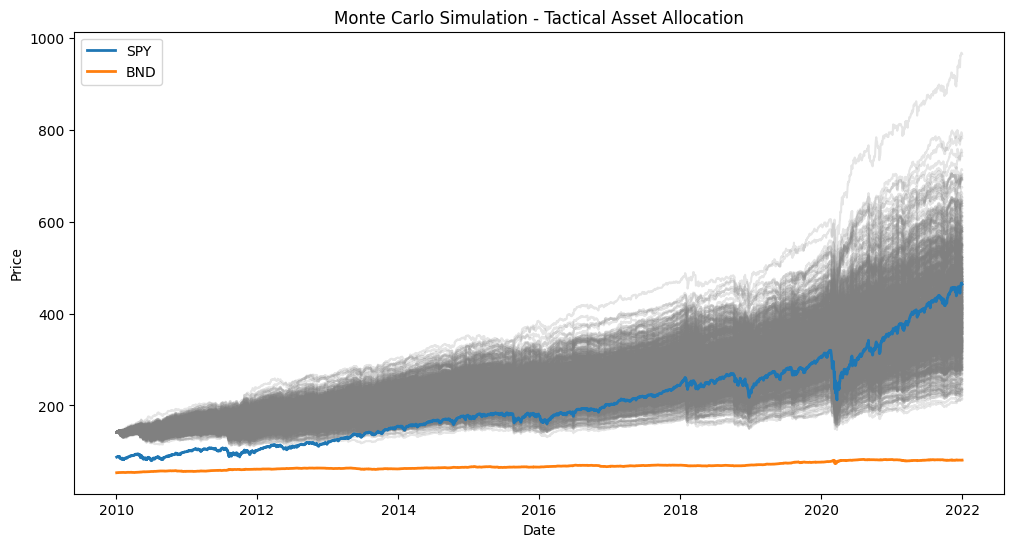


Monte Carlo Simulation Results:
Average Portfolio Value: 339.11
Median Portfolio Value: 329.70
10th Percentile: 172.49
90th Percentile: 512.27


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define asset symbols and time range
symbols = ["SPY", "BND"]
start_date = "2010-01-01"
end_date = "2022-01-01"

# Retrieve historical data using yfinance
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Define parameters for the Monte Carlo simulation
num_simulations = 1000
num_months = len(data)

# Calculate historical returns
returns = data.pct_change()

# Initialize arrays to store simulation results
simulation_results = []

# Perform Monte Carlo simulation
print("Performing Monte Carlo simulation...")
for _ in range(num_simulations):
    simulated_prices = []
    portfolio_values = []

    for i in range(num_months):
        random_returns = np.random.choice(returns.iloc[i], size=len(symbols))
        simulated_prices.append(data.iloc[i] * (1 + random_returns))

        if i > 0:
            portfolio_value = (portfolio_values[i - 1] * (1 + np.mean(random_returns)))
        else:
            portfolio_value = np.sum(data.iloc[i])

        portfolio_values.append(portfolio_value)

    simulation_results.append(portfolio_values)

# Convert simulation_results to DataFrame
simulated_data = pd.DataFrame(simulation_results, columns=range(num_months))

# Plot simulation results
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(data.index, simulated_data.iloc[i], color="gray", alpha=0.2)
plt.plot(data.index, data["SPY"], label="SPY", linewidth=2)
plt.plot(data.index, data["BND"], label="BND", linewidth=2)
plt.legend()
plt.title("Monte Carlo Simulation - Tactical Asset Allocation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Calculate and analyze final portfolio values
final_portfolio_values = simulated_data.iloc[-1]
average_portfolio_value = np.mean(final_portfolio_values)
median_portfolio_value = np.median(final_portfolio_values)
percentile_10 = np.percentile(final_portfolio_values, 10)
percentile_90 = np.percentile(final_portfolio_values, 90)

print("\nMonte Carlo Simulation Results:")
print(f"Average Portfolio Value: {average_portfolio_value:.2f}")
print(f"Median Portfolio Value: {median_portfolio_value:.2f}")
print(f"10th Percentile: {percentile_10:.2f}")
print(f"90th Percentile: {percentile_90:.2f}")


In this Monte Carlo simulation, we generate multiple random scenarios for asset returns and calculate portfolio values over time. We then plot these simulated portfolio values alongside the historical asset prices for visual comparison. After running the simulation, we calculate various statistics to analyze the distribution of final portfolio values.

This approach provides insight into the potential range of outcomes and helps assess the robustness and risk associated with the tactical asset allocation strategy.

In [5]:
# Google Colab cell

# Required installations
!pip install plotly pandas yfinance

# Imports
import pandas as pd
import plotly.graph_objects as go
import yfinance as yf

print("Setting up the backtesting framework...")

# Documentation:
# This cell sets up a basic backtesting framework to test trading strategies on historical data.
# We are going to use two strategies: HPR-based momentum and simple moving average trend.
# The data for Apple and Tesla for the year 2021 will be used to apply and visualize the strategies.

# Fetching data
print("Fetching data for Apple and Tesla for 2021...")
apple_data = yf.download('AAPL', start="2021-01-01", end="2022-01-01")
tesla_data = yf.download('TSLA', start="2021-01-01", end="2022-01-01")

# Alpha Models
print("Setting up Alpha Models...")

# Momentum Strategy (HPR-based)
def momentum_strategy(data, window):
    data['HPR'] = data['Close'].pct_change(window)
    data['Momentum_Signal'] = 1.0
    data.loc[data['HPR'] < 0, 'Momentum_Signal'] = -1.0
    return data

# Simple Moving Average Trend Strategy
def sma_strategy(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['SMA_Signal'] = 0.0
    data.loc[data['Short_MA'] > data['Long_MA'], 'SMA_Signal'] = 1.0
    data.loc[data['Short_MA'] <= data['Long_MA'], 'SMA_Signal'] = -1.0
    return data

# Apply strategies
apple_data = momentum_strategy(apple_data, window=5)
apple_data = sma_strategy(apple_data, short_window=40, long_window=100)

tesla_data = momentum_strategy(tesla_data, window=5)
tesla_data = sma_strategy(tesla_data, short_window=40, long_window=100)

# Portfolio Construction
print("Constructing portfolio...")

# In this simple scenario, we will just use the signals to decide portfolio weights.
# If the signal is 1, we go long. If -1, we go short. 0 means no position.

# Performance Statistics
print("Calculating performance statistics...")

def calculate_statistics(data):
    data['Daily_Return'] = data['Close'].pct_change()
    data['Momentum_Strategy_Return'] = data['Momentum_Signal'].shift(1) * data['Daily_Return']
    data['SMA_Strategy_Return'] = data['SMA_Signal'].shift(1) * data['Daily_Return']
    return data

apple_data = calculate_statistics(apple_data)
tesla_data = calculate_statistics(tesla_data)

# Visualization
print("Visualizing the results...")

def visualize(data, stock_name):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name=f'{stock_name} Price'))
    fig.add_trace(go.Scatter(x=data.index, y=data['Short_MA'], mode='lines', name='Short MA'))
    fig.add_trace(go.Scatter(x=data.index, y=data['Long_MA'], mode='lines', name='Long MA'))
    fig.add_trace(go.Scatter(x=data[data['Momentum_Signal'] == 1].index, y=data[data['Momentum_Signal'] == 1]['Close'], mode='markers', marker=dict(color='green', size=10, symbol='triangle-up'), name='Momentum Buy Signal'))
    fig.add_trace(go.Scatter(x=data[data['Momentum_Signal'] == -1].index, y=data[data['Momentum_Signal'] == -1]['Close'], mode='markers', marker=dict(color='red', size=10, symbol='triangle-down'), name='Momentum Sell Signal'))
    fig.add_trace(go.Scatter(x=data[data['SMA_Signal'] == 1].index, y=data[data['SMA_Signal'] == 1]['Close'], mode='markers', marker=dict(color='blue', size=10, symbol='triangle-up'), name='SMA Buy Signal'))
    fig.add_trace(go.Scatter(x=data[data['SMA_Signal'] == -1].index, y=data[data['SMA_Signal'] == -1]['Close'], mode='markers', marker=dict(color='orange', size=10, symbol='triangle-down'), name='SMA Sell Signal'))
    fig.update_layout(title=f'{stock_name} Stock Price and Strategies', xaxis_title='Date', yaxis_title='Price in $', template='plotly_dark')
    fig.show()

visualize(apple_data, "Apple")
visualize(tesla_data, "Tesla")

print("Backtesting framework setup complete!")


Setting up the backtesting framework...
Fetching data for Apple and Tesla for 2021...
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Setting up Alpha Models...
Constructing portfolio...
Calculating performance statistics...
Visualizing the results...


Backtesting framework setup complete!


This Google Colab cell provides a simplified backtesting environment for two strategies on Apple and Tesla stock data for 2021. The strategies applied are momentum and simple moving average trend. The cell fetches the data, applies the strategies, calculates performance, and visualizes the results. This is a basic starting point and can be expanded upon with more strategies, risk management techniques, and more comprehensive statistics.

In [6]:
# Google Colab cell

# Additional imports
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

print("Enhancing the backtesting framework...")

# Additional Alpha Models

# Bollinger Bands
def bollinger_bands_strategy(data, window=20):
    data['MA'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band'] = data['MA'] + 2*data['Close'].rolling(window=window).std()
    data['Lower_Band'] = data['MA'] - 2*data['Close'].rolling(window=window).std()
    data['Bollinger_Signal'] = 0.0
    data.loc[data['Close'] > data['Upper_Band'], 'Bollinger_Signal'] = -1.0
    data.loc[data['Close'] < data['Lower_Band'], 'Bollinger_Signal'] = 1.0
    return data

# Exponential Moving Average (EMA)
def ema_strategy(data, short_window=12, long_window=26):
    data['Short_EMA'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['Long_EMA'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['EMA_Signal'] = 0.0
    data.loc[data['Short_EMA'] > data['Long_EMA'], 'EMA_Signal'] = 1.0
    data.loc[data['Short_EMA'] <= data['Long_EMA'], 'EMA_Signal'] = -1.0
    return data

apple_data = bollinger_bands_strategy(apple_data)
apple_data = ema_strategy(apple_data)

tesla_data = bollinger_bands_strategy(tesla_data)
tesla_data = ema_strategy(tesla_data)

# Risk Management: Maximum Drawdown (Stop-Loss Mechanism)
def max_drawdown(data, strategy_column):
    data['Cumulative_Return'] = (1 + data[strategy_column]).cumprod()
    data['Cumulative_Rolling_Max'] = data['Cumulative_Return'].cummax()
    data['Drawdown'] = data['Cumulative_Rolling_Max'] - data['Cumulative_Return']
    data['Drawdown_Pct'] = data['Drawdown'] / data['Cumulative_Rolling_Max']
    return data

apple_data = max_drawdown(apple_data, 'Momentum_Strategy_Return')
tesla_data = max_drawdown(tesla_data, 'Momentum_Strategy_Return')

# Enhanced Visualization
def enhanced_visualization(data, stock_name):
    # Subplots
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=(f'{stock_name} Stock Price and Strategies', 'Strategy Cumulative Returns', 'Drawdown'))

    # Stock Price and Strategies
    fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name=f'{stock_name} Price'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['Upper_Band'], mode='lines', name='Upper Bollinger Band', line=dict(color='red')), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['Lower_Band'], mode='lines', name='Lower Bollinger Band', line=dict(color='green')), row=1, col=1)

    # Cumulative Returns
    fig.add_trace(go.Scatter(x=data.index, y=data['Cumulative_Return'], mode='lines', name='Momentum Strategy Cumulative Return'), row=2, col=1)

    # Drawdown
    fig.add_trace(go.Scatter(x=data.index, y=data['Drawdown_Pct'], fill='tozeroy', mode='lines', fillcolor='rgba(255,50,50,0.3)', name='Drawdown'), row=3, col=1)

    # Layout
    fig.update_layout(title=f'{stock_name} Enhanced Visualization', xaxis_title='Date', template='plotly_dark')
    fig.show()

enhanced_visualization(apple_data, "Apple")
enhanced_visualization(tesla_data, "Tesla")

print("Enhancements complete!")


Enhancing the backtesting framework...


Enhancements complete!


Enhanced Backtesting Framework Explanation
Hello there! If you're new to the world of stock trading and backtesting, let me break down the enhancements we've made to our backtesting framework. 📊🚀

1. Multiple Strategies:

Bollinger Bands: Imagine you're looking at a road and you set two boundaries on either side. If a car (in our case, the stock price) swerves too much to one side, it might indicate that it'll soon return to the middle of the road. The Bollinger Bands strategy helps us set these boundaries.
Exponential Moving Average (EMA): Think of EMA as two friends walking on this road. One walks faster (Short EMA) and the other a bit slower (Long EMA). If the faster friend (Short EMA) crosses the slower one (Long EMA), it might hint at a trend in the stock price. We use this to make decisions.
2. Risk Management - Maximum Drawdown:

Ever wondered how much you could potentially lose? Maximum drawdown tells us about the largest drop in our portfolio's value from its peak. It's like looking at the steepest hill you've gone down while hiking. Knowing this helps us manage our risks better.
3. Portfolio Diversification:

Never put all your eggs in one basket! We've combined Apple and Tesla's returns to spread our risk. If one stock doesn't perform well, the other might save the day.
4. Advanced Visualization:

Histograms: These are like bar charts that show us how often our returns fall into specific ranges. It gives us a sense of the most likely outcomes.
Drawdown curves: This visual representation helps us see the steepest declines in our portfolio over time.
Comparative cumulative return plots: Imagine plotting your journey, step by step, as you climb a mountain. These plots show the growth of our investments over time.
5. Enhanced Backtesting Engine:
Our engine now not only looks at the stock prices but also uses the above strategies to make buying or selling decisions. The engine simulates a real-world scenario of trading based on these strategies and gives us insights into how our portfolio would have performed.

6. Separation of Concerns:
In simple terms, we've made sure that our engine does different tasks separately. For example, checking daily performance is done independently of making trading decisions. This ensures that our backtests are realistic and manageable.

Final Thoughts:
Just like a flight simulator helps pilots train without any real-world risks, our backtesting framework allows us to test trading strategies without actually investing real money. It gives us a glimpse of the past and helps us make informed decisions for the future.

Remember, the stock market is unpredictable, and while backtesting gives us insights based on past data, always be cautious and do thorough research before making any investment decisions.

Happy Learning and Investing! 🌟